# Part 1 : Dimentionality Reduction on IRIS dataset

In [28]:
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [29]:
iris = load_iris()

X = iris.data    # The inputs
y = iris.target  # The wanted output

df = pd.DataFrame(X,columns=iris.feature_names)
df['Label']=y
df['Species']=df['Label'].map({0: 'setosa', 1: 'versicolor', 2: 'virginica'})
df = df.drop(['Label'], axis=1)

In [30]:
df.head()   # The first five elements

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [31]:
df.tail()  # the last five elements

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica
149,5.9,3.0,5.1,1.8,virginica


In [32]:
df.describe()   # statistical and general information about the data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


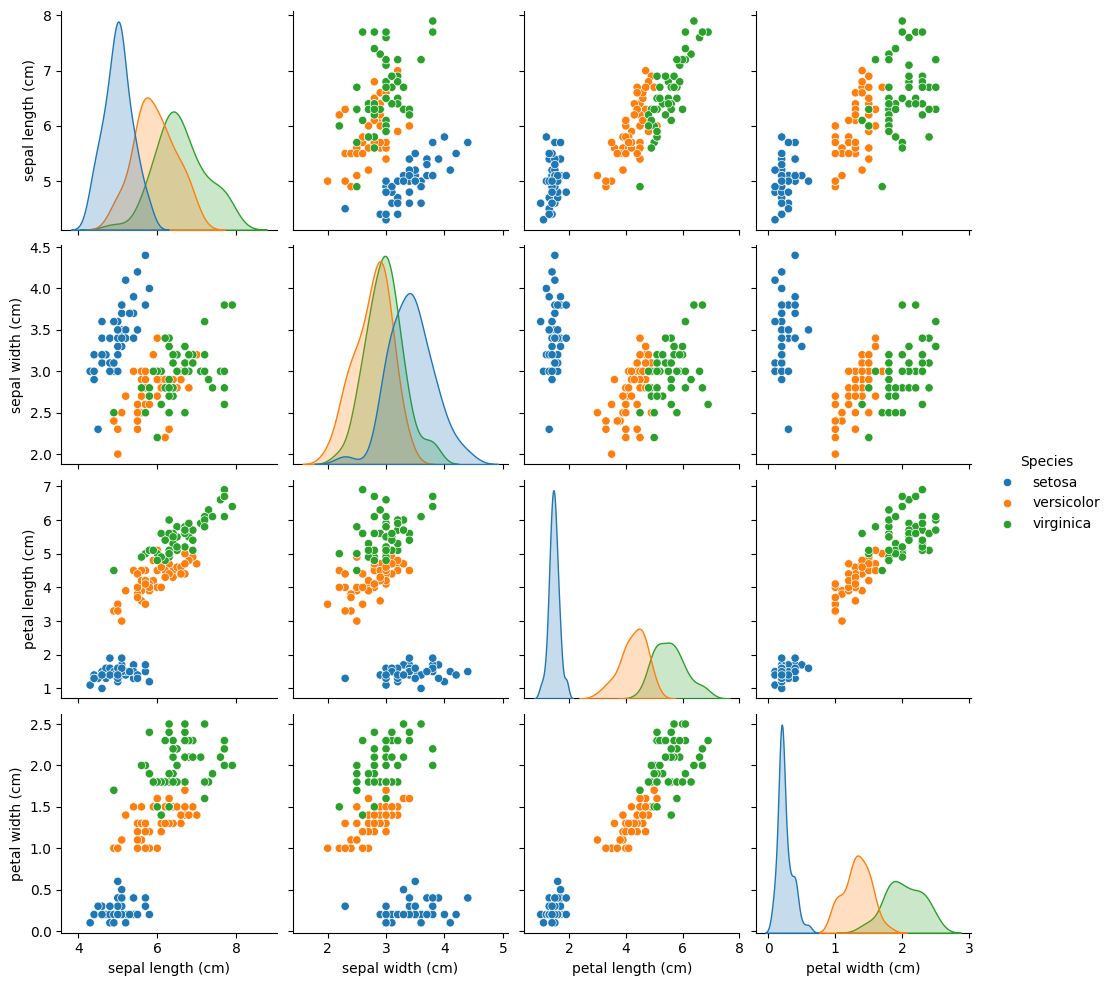

In [33]:
sns.pairplot(df,  hue='Species')

In [34]:
#Transform features
pca = PCA()
X_pca = pca.fit_transform(X)

#Merge with df
pca_df = pd.DataFrame(X_pca,columns=['PC1','PC2','PC3','PC4'])
df = pd.merge(df, pca_df, right_index=True, left_index=True)

In [35]:
# Explained Variance Ratio of principle components
for i in range(4):
    print('PC{}: {}'.format(i+1,pca.explained_variance_ratio_[i]))

PC1: 0.924618723201727
PC2: 0.053066483117065424
PC3: 0.01710260980793217
PC4: 0.005212183873275464


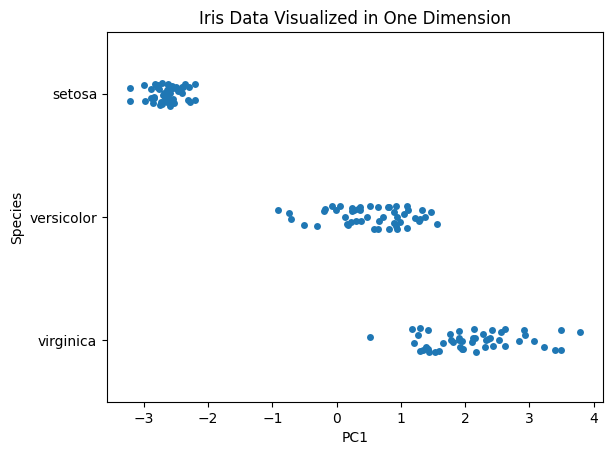

In [36]:
sns.stripplot(x="PC1", y="Species", data=df,jitter=True)
plt.title('Iris Data Visualized in One Dimension');

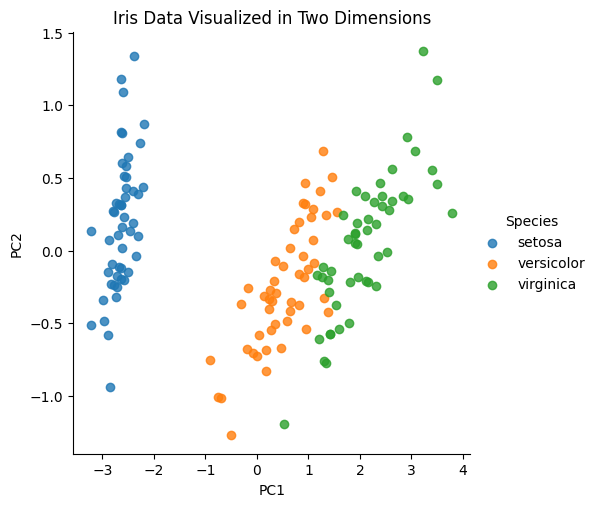

In [37]:
sns.lmplot(x='PC1',y='PC2',data=df,hue='Species',fit_reg=False)
plt.title('Iris Data Visualized in Two Dimensions');

In [38]:
# display the components of the PCA
pca.components_

array([[ 0.36138659, -0.08452251,  0.85667061,  0.3582892 ],
       [ 0.65658877,  0.73016143, -0.17337266, -0.07548102],
       [-0.58202985,  0.59791083,  0.07623608,  0.54583143],
       [ 0.31548719, -0.3197231 , -0.47983899,  0.75365743]])

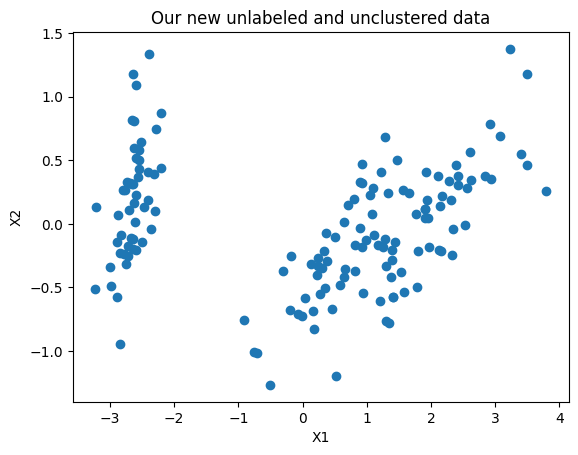

In [39]:
new_X = X_pca[:,:2]

plt.scatter(new_X[:, 0], new_X[:, 1])
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Our new unlabeled and unclustered data')
plt.show()

# Apply K-Means (k=2)

c:\Users\nolan\anaconda3\envs\nolanai\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


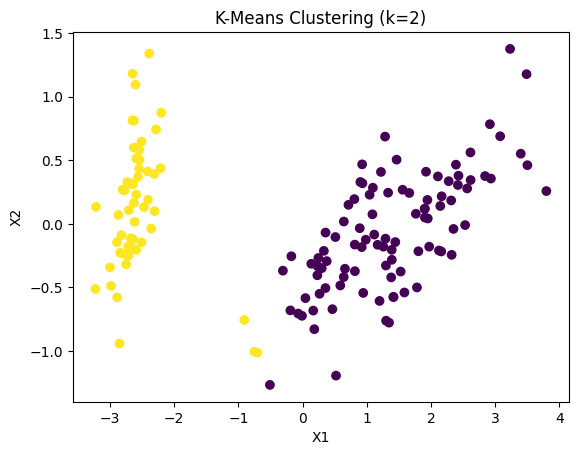

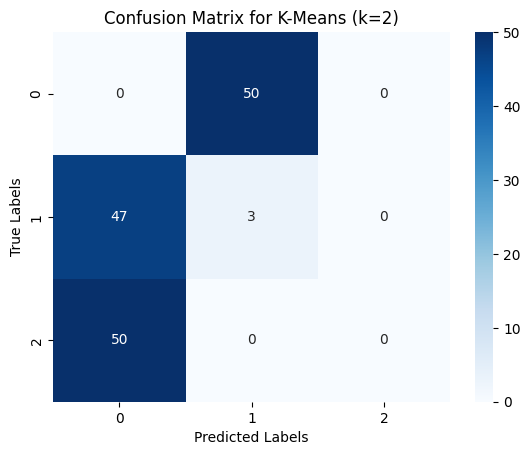

In [40]:
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix

# Apply K-Means (k=2)
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(new_X)

# Add cluster labels to the dataframe
df['Cluster_k2'] = kmeans.labels_

# Define labels_true using the original labels from the iris dataset
labels_true = iris.target

# Plot the clustered data
plt.scatter(new_X[:, 0], new_X[:, 1], c=kmeans.labels_, cmap='viridis')
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('K-Means Clustering (k=2)')
plt.show()


# Calculate the confusion matrix
conf_matrix = confusion_matrix(labels_true, df['Cluster_k2'])

# Plot the confusion matrix
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


# Apply k-Means (k=3)

c:\Users\nolan\anaconda3\envs\nolanai\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


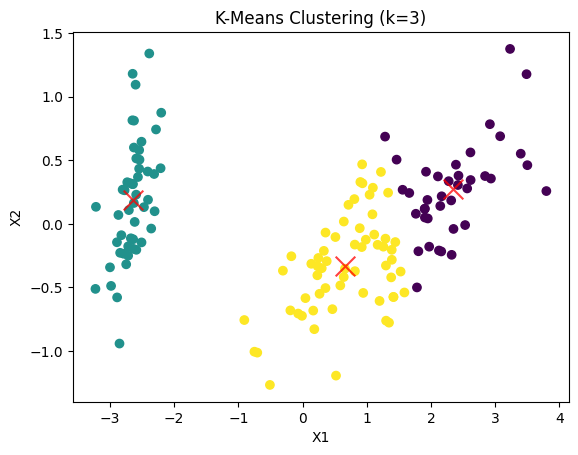

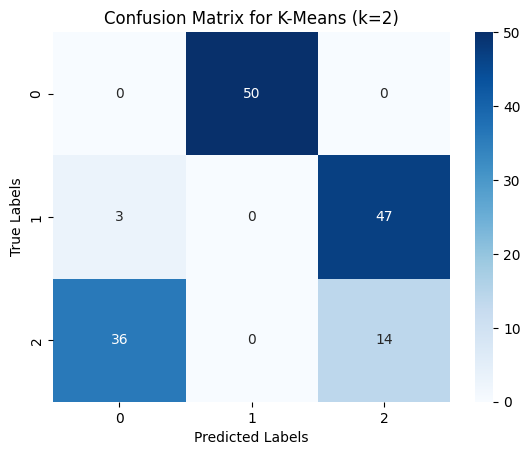

In [41]:
# Apply K-Means (k=3)
kmeans_3 = KMeans(n_clusters=3, random_state=42)
kmeans_3.fit(new_X)

# Add cluster labels to the dataframe
df['Cluster_k3'] = kmeans_3.labels_

# Plot the clustered data
plt.scatter(new_X[:, 0], new_X[:, 1], c=kmeans_3.labels_, cmap='viridis')
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('K-Means Clustering (k=3)')

# Calculate and plot the center of gravity for each cluster
centers = kmeans_3.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.75, marker='x')

plt.show()

# Define labels_true using the original labels from the iris dataset
labels_true = iris.target
# Calculate the confusion matrix
conf_matrix = confusion_matrix(labels_true, df['Cluster_k3'])

# Plot the confusion matrix
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


# Apply mini batch k-means (k=3)

c:\Users\nolan\anaconda3\envs\nolanai\Lib\site-packages\sklearn\cluster\_kmeans.py:1955: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 3072 or by setting the environment variable OMP_NUM_THREADS=1
  warnings.warn(


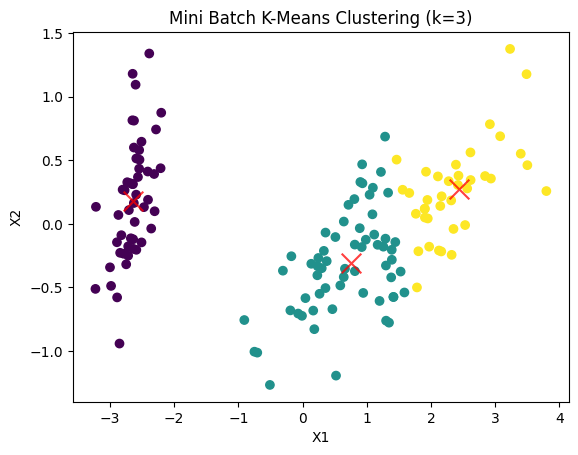

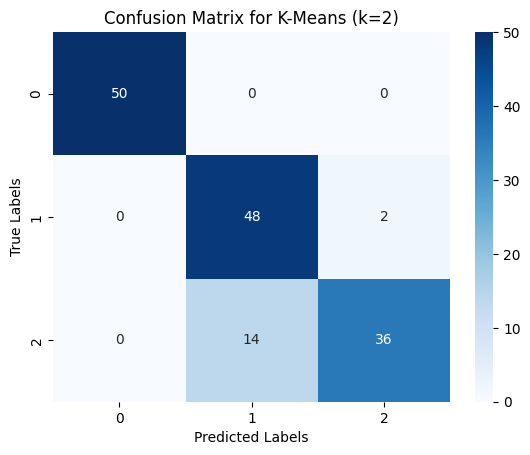

In [42]:
from sklearn.cluster import MiniBatchKMeans

# Apply Mini Batch K-Means (k=3)
mini_kmeans = MiniBatchKMeans(n_clusters=3, random_state=42)
mini_kmeans.fit(new_X)

# Add cluster labels to the dataframe
df['Cluster_mini_k3'] = mini_kmeans.labels_

# Plot the clustered data
plt.scatter(new_X[:, 0], new_X[:, 1], c=mini_kmeans.labels_, cmap='viridis')
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Mini Batch K-Means Clustering (k=3)')

# Calculate and plot the center of gravity for each cluster
mini_centers = mini_kmeans.cluster_centers_
plt.scatter(mini_centers[:, 0], mini_centers[:, 1], c='red', s=200, alpha=0.75, marker='x')

plt.show()

# Define labels_true using the original labels from the iris dataset
labels_true = iris.target
# Calculate the confusion matrix
conf_matrix = confusion_matrix(labels_true, df['Cluster_mini_k3'])

# Plot the confusion matrix
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# Apply Affinity Propagation Clustering

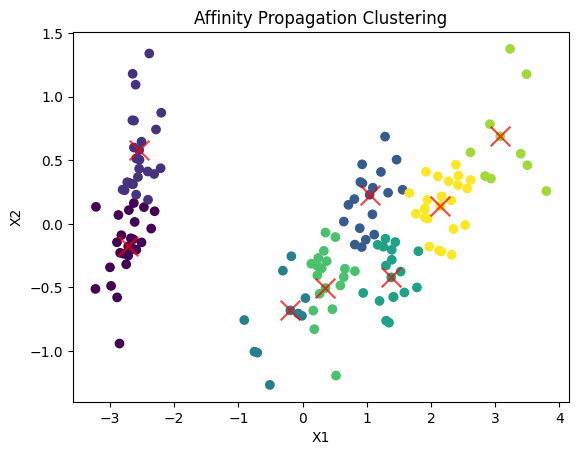

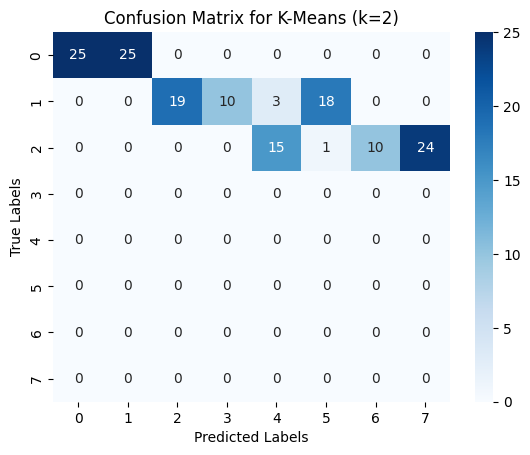

In [43]:
from sklearn.cluster import AffinityPropagation

# Apply Affinity Propagation Clustering
affinity_propagation = AffinityPropagation(random_state=42)
affinity_propagation.fit(new_X)

# Add cluster labels to the dataframe
df['Cluster_affinity'] = affinity_propagation.labels_

# Plot the clustered data
plt.scatter(new_X[:, 0], new_X[:, 1], c=affinity_propagation.labels_, cmap='viridis')
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Affinity Propagation Clustering')

# Calculate and plot the center of gravity for each cluster
affinity_centers = affinity_propagation.cluster_centers_
plt.scatter(affinity_centers[:, 0], affinity_centers[:, 1], c='red', s=200, alpha=0.75, marker='x')

plt.show()


# Define labels_true using the original labels from the iris dataset
labels_true = iris.target
# Calculate the confusion matrix
conf_matrix = confusion_matrix(labels_true, df['Cluster_affinity'])

# Plot the confusion matrix
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# Apply Mean Shift Clustering

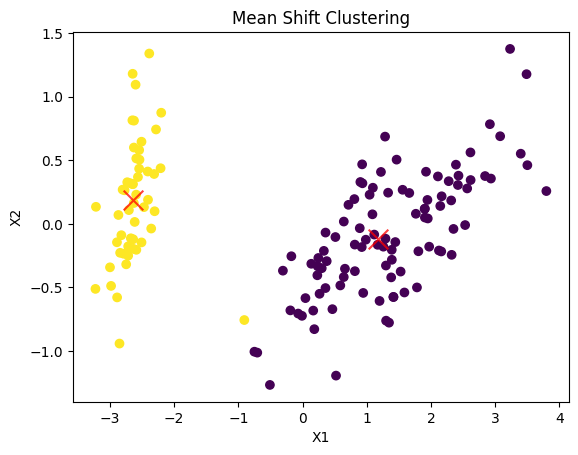

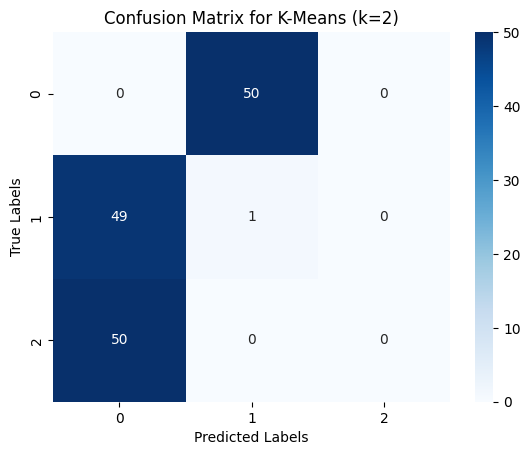

In [44]:
from sklearn.cluster import MeanShift

# Apply Mean Shift Clustering
mean_shift = MeanShift()
mean_shift.fit(new_X)

# Add cluster labels to the dataframe
df['Cluster_mean_shift'] = mean_shift.labels_

# Plot the clustered data
plt.scatter(new_X[:, 0], new_X[:, 1], c=mean_shift.labels_, cmap='viridis')
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Mean Shift Clustering')

# Calculate and plot the center of gravity for each cluster
mean_shift_centers = mean_shift.cluster_centers_
plt.scatter(mean_shift_centers[:, 0], mean_shift_centers[:, 1], c='red', s=200, alpha=0.75, marker='x')

plt.show()


# Define labels_true using the original labels from the iris dataset
labels_true = iris.target
# Calculate the confusion matrix
conf_matrix = confusion_matrix(labels_true, df['Cluster_mean_shift'])

# Plot the confusion matrix
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


# Spectral Clustering

c:\Users\nolan\anaconda3\envs\nolanai\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


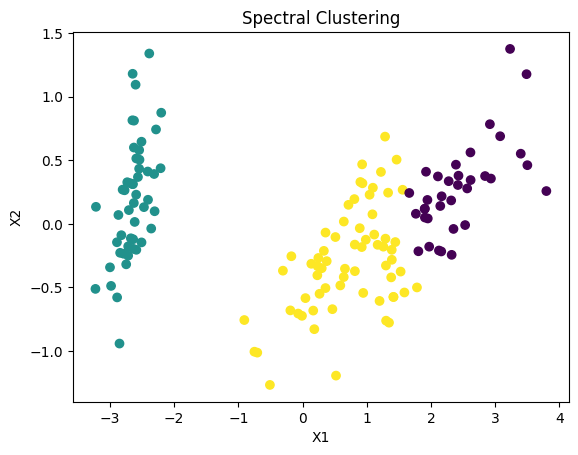

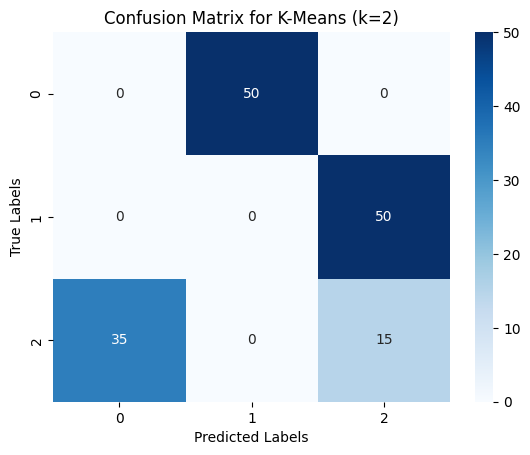

In [45]:
from sklearn.cluster import SpectralClustering

# Apply Spectral Clustering
spectral_clustering = SpectralClustering(n_clusters=3, random_state=42)
spectral_labels = spectral_clustering.fit_predict(new_X)

# Add cluster labels to the dataframe
df['Cluster_spectral'] = spectral_labels

# Plot the clustered data
plt.scatter(new_X[:, 0], new_X[:, 1], c=spectral_labels, cmap='viridis')
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Spectral Clustering')

plt.show()

# Define labels_true using the original labels from the iris dataset
labels_true = iris.target
# Calculate the confusion matrix
conf_matrix = confusion_matrix(labels_true, df['Cluster_spectral'])

# Plot the confusion matrix
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# Agglomerative Clustering

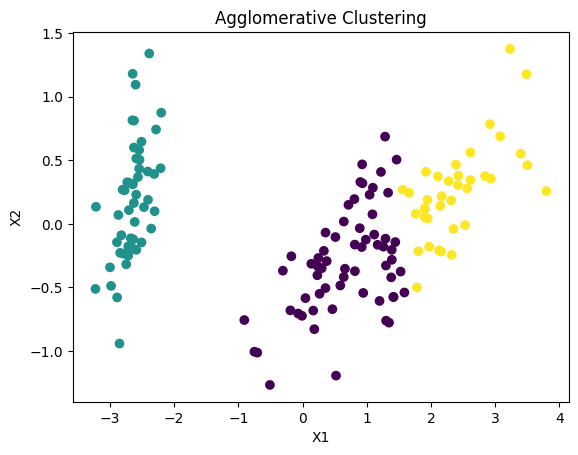

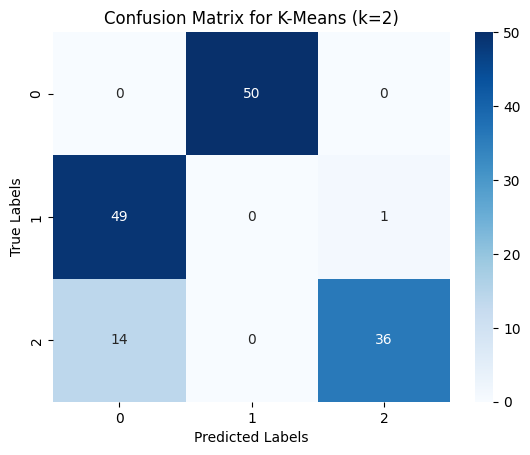

In [46]:
from sklearn.cluster import AgglomerativeClustering

# Apply Agglomerative Clustering
agg_clustering = AgglomerativeClustering(n_clusters=3)
agg_labels = agg_clustering.fit_predict(new_X)

# Add cluster labels to the dataframe
df['Cluster_agg'] = agg_labels

# Plot the clustered data
plt.scatter(new_X[:, 0], new_X[:, 1], c=agg_labels, cmap='viridis')
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Agglomerative Clustering')

plt.show()


# Define labels_true using the original labels from the iris dataset
labels_true = iris.target
# Calculate the confusion matrix
conf_matrix = confusion_matrix(labels_true, df['Cluster_agg'])

# Plot the confusion matrix
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# Gaussian Misture Clustering

c:\Users\nolan\anaconda3\envs\nolanai\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


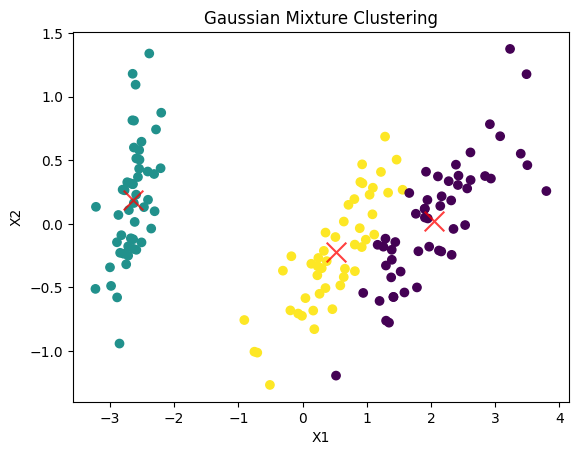

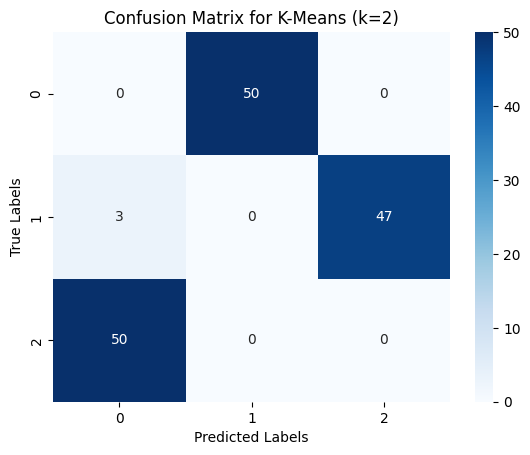

In [47]:
from sklearn.mixture import GaussianMixture

# Apply Gaussian Mixture Clustering
gmm = GaussianMixture(n_components=3, random_state=42)
gmm_labels = gmm.fit_predict(new_X)

# Add cluster labels to the dataframe
df['Cluster_gmm'] = gmm_labels

# Plot the clustered data
plt.scatter(new_X[:, 0], new_X[:, 1], c=gmm_labels, cmap='viridis')
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Gaussian Mixture Clustering')

# Calculate and plot the center of gravity for each cluster
gmm_centers = gmm.means_
plt.scatter(gmm_centers[:, 0], gmm_centers[:, 1], c='red', s=200, alpha=0.75, marker='x')

plt.show()


# Define labels_true using the original labels from the iris dataset
labels_true = iris.target
# Calculate the confusion matrix
conf_matrix = confusion_matrix(labels_true, df['Cluster_gmm'])

# Plot the confusion matrix
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# Accuracy based on original labels

Now consider the original IRIS labels ans measure the accuracy of each clustering labelling

In [48]:
from sklearn.metrics import adjusted_rand_score

# Calculate the adjusted Rand index for each clustering method
labels_true = iris.target

# Dictionary to store the ARI scores
ari_scores = {
    'K-Means (k=2)': adjusted_rand_score(labels_true, df['Cluster_k2']),
    'K-Means (k=3)': adjusted_rand_score(labels_true, df['Cluster_k3']),
    'Mini Batch K-Means (k=3)': adjusted_rand_score(labels_true, df['Cluster_mini_k3']),
    'Affinity Propagation': adjusted_rand_score(labels_true, df['Cluster_affinity']),
    'Mean Shift': adjusted_rand_score(labels_true, df['Cluster_mean_shift']),
    'Spectral Clustering': adjusted_rand_score(labels_true, df['Cluster_spectral']),
    'Agglomerative Clustering': adjusted_rand_score(labels_true, df['Cluster_agg']),
    'Gaussian Mixture Clustering': adjusted_rand_score(labels_true, df['Cluster_gmm'])
}

# Print the ARI scores in a formatted way
for method, score in ari_scores.items():
    print(f'{method}: {score:.4f}')


K-Means (k=2): 0.5399
K-Means (k=3): 0.7163
Mini Batch K-Means (k=3): 0.7302
Affinity Propagation: 0.4395
Mean Shift: 0.5584
Spectral Clustering: 0.7455
Agglomerative Clustering: 0.7445
Gaussian Mixture Clustering: 0.9410
